# Image Recognition using Pre-Trained model 
- How to use Pre-Built convolutional Neural Network in Keras ? 
- We will use Neural Network known as VGG16
- VGG16 is trained on ImageNet Dataset 
- It was able to recognise 1000 common qorld objects 

In [1]:
import os 
import keras

Pre-Trained built in models available in Keras:

https://keras.io/api/applications/

- They are very large in size 
- Needs to be downloaded and stored , if working in a system 

## Pre Trained models 

- From keras, you can access them using application module. 
- The first time you acces them, keras will download to your computer, and since these models are fairly large, these models will take some time to use for first time. 
- You need to Pre-Process image in a particular manner when you use a oarticular model, keras makes it easy for you to do this, by using Pre-Process input. 

# Step 1 : Load the model in the memory (If doing for the first time , the model will download and load in the memory 

In [2]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [3]:
model = VGG16()

553476096/553467096 [==============================] - 68s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

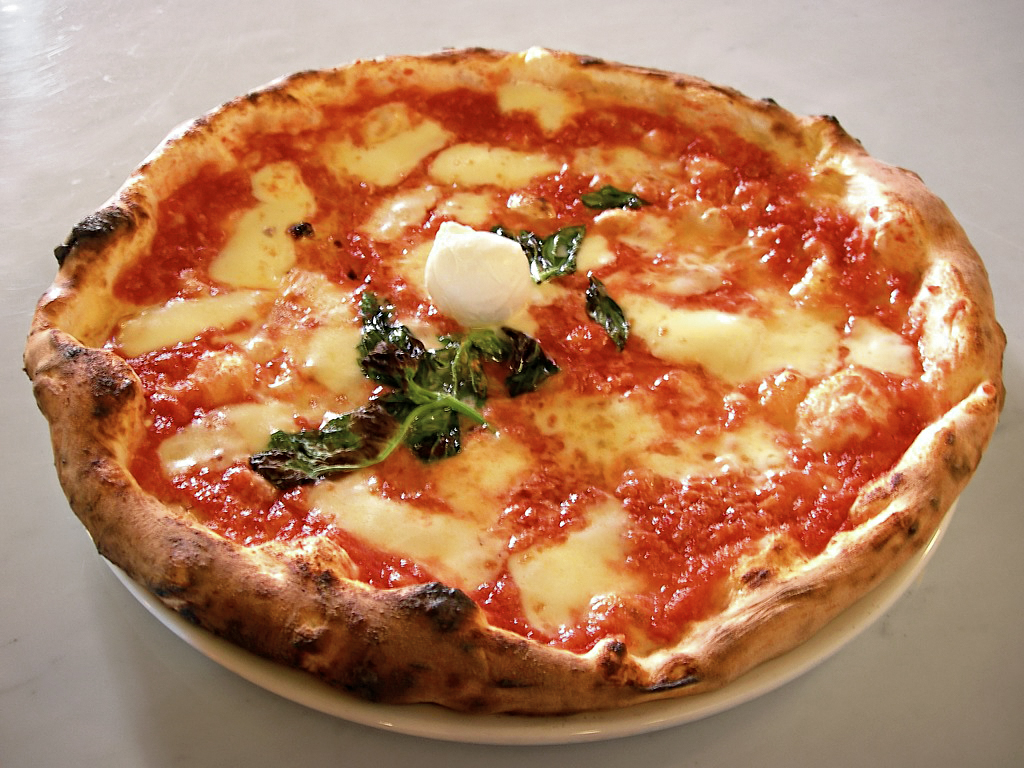

# Step 2: Load the image, make sure that the image is of size the model can take as input 

In [9]:
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/pizza.jpg'

In [10]:
img = load_img(img_path, target_size=(224, 224))

## Note: 
- Most of the pre-trained models have a constrains on the size of the image that they can take for pre processing 
- These details will be availabel on keras documentation 
- VGG16 can take only images of size 224x224

In [11]:
img.size

(224, 224)

# Step 3: Preprocess the data, Image must be converted into an array and necessary pre-processing to be appplied 

In [12]:
img_array = img_to_array(img)

In [13]:
img_array.shape    # 3 RGB Channels

(224, 224, 3)

- We will be using the function 'preprocess_input()' for preprocessing 
- This function requires the input of the image as 4D Tensor. Reason : 
    - Keras work with batches of the image. So, The first dimention is used as the number of samples(or images) you have. 
    - When you load a single image, you get the shape of one image, which is (width, height, channels)
    - Inorder to create a batch of images, you need additional dimention : (samples, width, height, channel)
- So, wen need to expand the dimention of image as shown below. 

In [14]:
img_array = np.expand_dims(img_array, axis=0)

In [15]:
img_array.shape

(1, 224, 224, 3)

In [16]:
img_array

array([[[[242., 242., 244.],
         [240., 241., 243.],
         [233., 234., 236.],
         ...,
         [173., 163., 161.],
         [172., 162., 161.],
         [172., 162., 161.]],

        [[225., 226., 230.],
         [234., 235., 237.],
         [248., 248., 250.],
         ...,
         [174., 164., 163.],
         [170., 160., 159.],
         [170., 160., 159.]],

        [[237., 238., 240.],
         [253., 253., 253.],
         [255., 255., 255.],
         ...,
         [171., 161., 160.],
         [172., 162., 161.],
         [171., 161., 160.]],

        ...,

        [[136., 126., 117.],
         [138., 129., 120.],
         [138., 129., 122.],
         ...,
         [124., 111.,  92.],
         [122., 110.,  88.],
         [124., 111.,  92.]],

        [[137., 124., 116.],
         [135., 124., 118.],
         [137., 128., 121.],
         ...,
         [124., 111.,  92.],
         [123., 110.,  91.],
         [122., 109.,  90.]],

        [[138., 125., 116.],
       

- The 'preprocess_input()' function is meant to adequet your image to the format of the model required 
    - When we apply this funtion, The images are converted from RGB to BGR, then each color channel is Zero-Centered with respect to ImageNet dataset, without scaling.
    - Some models use images with values ranging from 0 to 1. Others from -1 to +1.
    - Others use Caffe style, that is not Normalised, but Centered. 
    - The imageNet is using Caffe style 
    
- You dont need to worry about the internal details of preprocess_input. But ideally, you should load the images with the keras funtion for that (so you can guarentee the images you load are compatable with pre-process input)

In [17]:
img_pre_processed = preprocess_input(img_array)

In [18]:
img_pre_processed

array([[[[140.061    , 125.221    , 118.32     ],
         [139.061    , 124.221    , 116.32     ],
         [132.061    , 117.221    , 109.32     ],
         ...,
         [ 57.060997 ,  46.221    ,  49.32     ],
         [ 57.060997 ,  45.221    ,  48.32     ],
         [ 57.060997 ,  45.221    ,  48.32     ]],

        [[126.061    , 109.221    , 101.32     ],
         [133.061    , 118.221    , 110.32     ],
         [146.061    , 131.22101  , 124.32     ],
         ...,
         [ 59.060997 ,  47.221    ,  50.32     ],
         [ 55.060997 ,  43.221    ,  46.32     ],
         [ 55.060997 ,  43.221    ,  46.32     ]],

        [[136.061    , 121.221    , 113.32     ],
         [149.061    , 136.22101  , 129.32     ],
         [151.061    , 138.22101  , 131.32     ],
         ...,
         [ 56.060997 ,  44.221    ,  47.32     ],
         [ 57.060997 ,  45.221    ,  48.32     ],
         [ 56.060997 ,  44.221    ,  47.32     ]],

        ...,

        [[ 13.060997 ,   9.221001 ,  1

# Step 4: Use the Pre-Processed array to obtain the predictions from the model 


In [19]:
from keras.applications.vgg16 import decode_predictions

The below line of code produces array of length 1000, currosponding to probablities for all those 1000 classes for which vgg16 model has been pre-trained. 

In [20]:
preds = model.predict(img_pre_processed)

In [21]:
preds

array([[8.09402198e-12, 1.19739818e-09, 3.63044490e-11, 6.16765753e-12,
        5.38118898e-12, 4.67017369e-10, 1.60714220e-11, 6.41265444e-11,
        6.68800515e-10, 2.15077327e-12, 3.10412651e-09, 3.94309835e-10,
        2.09437245e-09, 1.35690931e-10, 8.78267771e-12, 1.84269003e-10,
        1.54407372e-11, 2.10021462e-11, 1.06973024e-11, 6.47693149e-11,
        5.73019106e-12, 5.49854433e-12, 1.32985615e-12, 1.92453128e-12,
        1.05192305e-11, 4.44278052e-11, 1.43762807e-10, 8.15149392e-10,
        1.81951971e-11, 6.80916296e-11, 7.43052911e-11, 1.61424915e-10,
        1.58936564e-09, 4.55191551e-10, 3.86957480e-11, 1.22815594e-11,
        1.36552131e-10, 3.92724631e-10, 4.79940698e-10, 6.89639058e-12,
        1.59172509e-10, 7.92498966e-12, 1.62174510e-10, 1.45306241e-11,
        1.93776314e-11, 6.91385907e-11, 1.28756367e-10, 1.16889332e-09,
        9.66807363e-13, 2.53120771e-11, 1.08658291e-10, 1.90061682e-11,
        1.60219712e-10, 3.37314177e-10, 5.36553690e-09, 8.574699

In [22]:
# This function results to a list of tuples (class, description, probablity) for top n classes 

decode_predictions(preds, top=5)

49152/35363 [=========================================] - 0s 0us/step


[[('n07873807', 'pizza', 0.9987103),
  ('n07693725', 'bagel', 0.0004767566),
  ('n07717410', 'acorn_squash', 0.0001462612),
  ('n07716358', 'zucchini', 0.00013352919),
  ('n07753113', 'fig', 0.000107980035)]]

## Note : 
- vgg16 model is trained is trained on imagenet database to identify 1000 common onjects/animal/places etc
- To check what are those 1000 images (of object animal etc) on which the model is trained, one can give top value as 1000 as shown below: 

In [24]:
decode_predictions(preds, top=1000)

[[('n07873807', 'pizza', 0.9987103),
  ('n07693725', 'bagel', 0.0004767566),
  ('n07717410', 'acorn_squash', 0.0001462612),
  ('n07716358', 'zucchini', 0.00013352919),
  ('n07753113', 'fig', 0.000107980035),
  ('n07684084', 'French_loaf', 9.5818046e-05),
  ('n07768694', 'pomegranate', 9.028094e-05),
  ('n07875152', 'potpie', 5.453901e-05),
  ('n07579787', 'plate', 3.5352572e-05),
  ('n02776631', 'bakery', 3.1126732e-05),
  ('n07742313', 'Granny_Smith', 1.4971448e-05),
  ('n07745940', 'strawberry', 1.379779e-05),
  ('n04263257', 'soup_bowl', 9.127822e-06),
  ('n07747607', 'orange', 7.679422e-06),
  ('n03400231', 'frying_pan', 6.849952e-06),
  ('n07871810', 'meat_loaf', 5.992061e-06),
  ('n07860988', 'dough', 5.3712847e-06),
  ('n04270147', 'spatula', 4.8429347e-06),
  ('n07720875', 'bell_pepper', 3.930649e-06),
  ('n04597913', 'wooden_spoon', 3.5990217e-06),
  ('n07697537', 'hotdog', 3.5826972e-06),
  ('n07734744', 'mushroom', 3.5543521e-06),
  ('n07714990', 'broccoli', 3.534736e-06),
 

## Q]. Lets load the data with a different image : 

# AR - M16A4

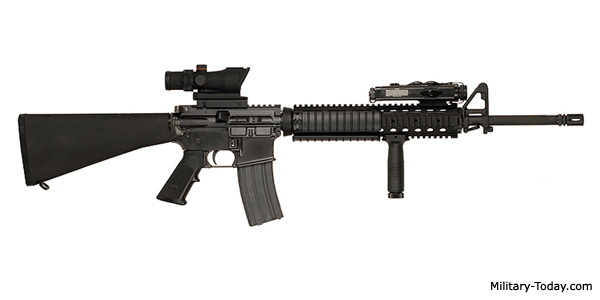

Lets do this quick and easy with the main funtions 

In [25]:
model = VGG16()
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/m16a4.jpg' # Load data
img = load_img(img_path, target_size=(224, 224))                                  # Required size
img_array = img_to_array(img)                                                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)                                     # Increase dimention for CNN
img_pre_processed = preprocess_input(img_array)                                   # Process data 
preds = model.predict(img_pre_processed)                                          # Predict data 
decode_predictions(preds, top=5)                                                  # Show top 5 with highest probablity 

[[('n02749479', 'assault_rifle', 0.70091426),
  ('n04090263', 'rifle', 0.29813778),
  ('n02879718', 'bow', 0.0002638098),
  ('n04485082', 'tripod', 0.00017107384),
  ('n04086273', 'revolver', 0.00014885423)]]

# Dumbbells

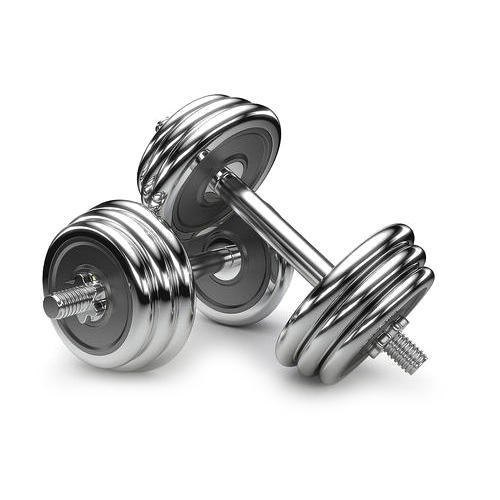

In [26]:
model = VGG16()
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/dumble.jpg' # Load data
img = load_img(img_path, target_size=(224, 224))                                  # Required size
img_array = img_to_array(img)                                                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)                                     # Increase dimention for CNN
img_pre_processed = preprocess_input(img_array)                                   # Process data 
preds = model.predict(img_pre_processed)                                          # Predict data 
decode_predictions(preds, top=5)                                                  # Show top 5 with highest probablity 

[[('n03255030', 'dumbbell', 0.6633722),
  ('n02790996', 'barbell', 0.22164631),
  ('n04153751', 'screw', 0.024806345),
  ('n03804744', 'nail', 0.021851476),
  ('n04286575', 'spotlight', 0.0082606515)]]

# Lets do this with VGG19 model

# AR - M16A4

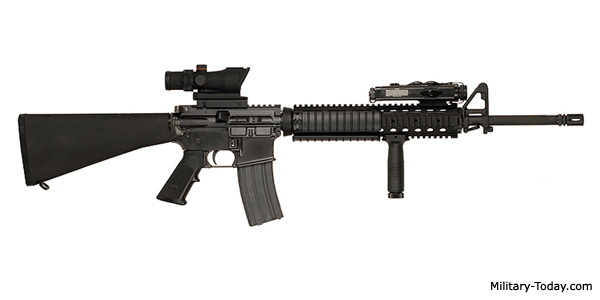

In [28]:
from keras.applications.vgg19 import VGG19, preprocess_input
model = VGG19()
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/m16a4.jpg' # Load data
img = load_img(img_path, target_size=(224, 224))                                  # Required size
img_array = img_to_array(img)                                                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)                                     # Increase dimention for CNN
img_pre_processed = preprocess_input(img_array)                                   # Process data 
preds = model.predict(img_pre_processed)                                          # Predict data 
decode_predictions(preds, top=5) 

574726144/574710816 [==============================] - 128s 0us/step


[[('n02749479', 'assault_rifle', 0.8276126),
  ('n04090263', 'rifle', 0.16499518),
  ('n03967562', 'plow', 0.0031487131),
  ('n02879718', 'bow', 0.0012087731),
  ('n04086273', 'revolver', 0.0008627342)]]

# Bunny

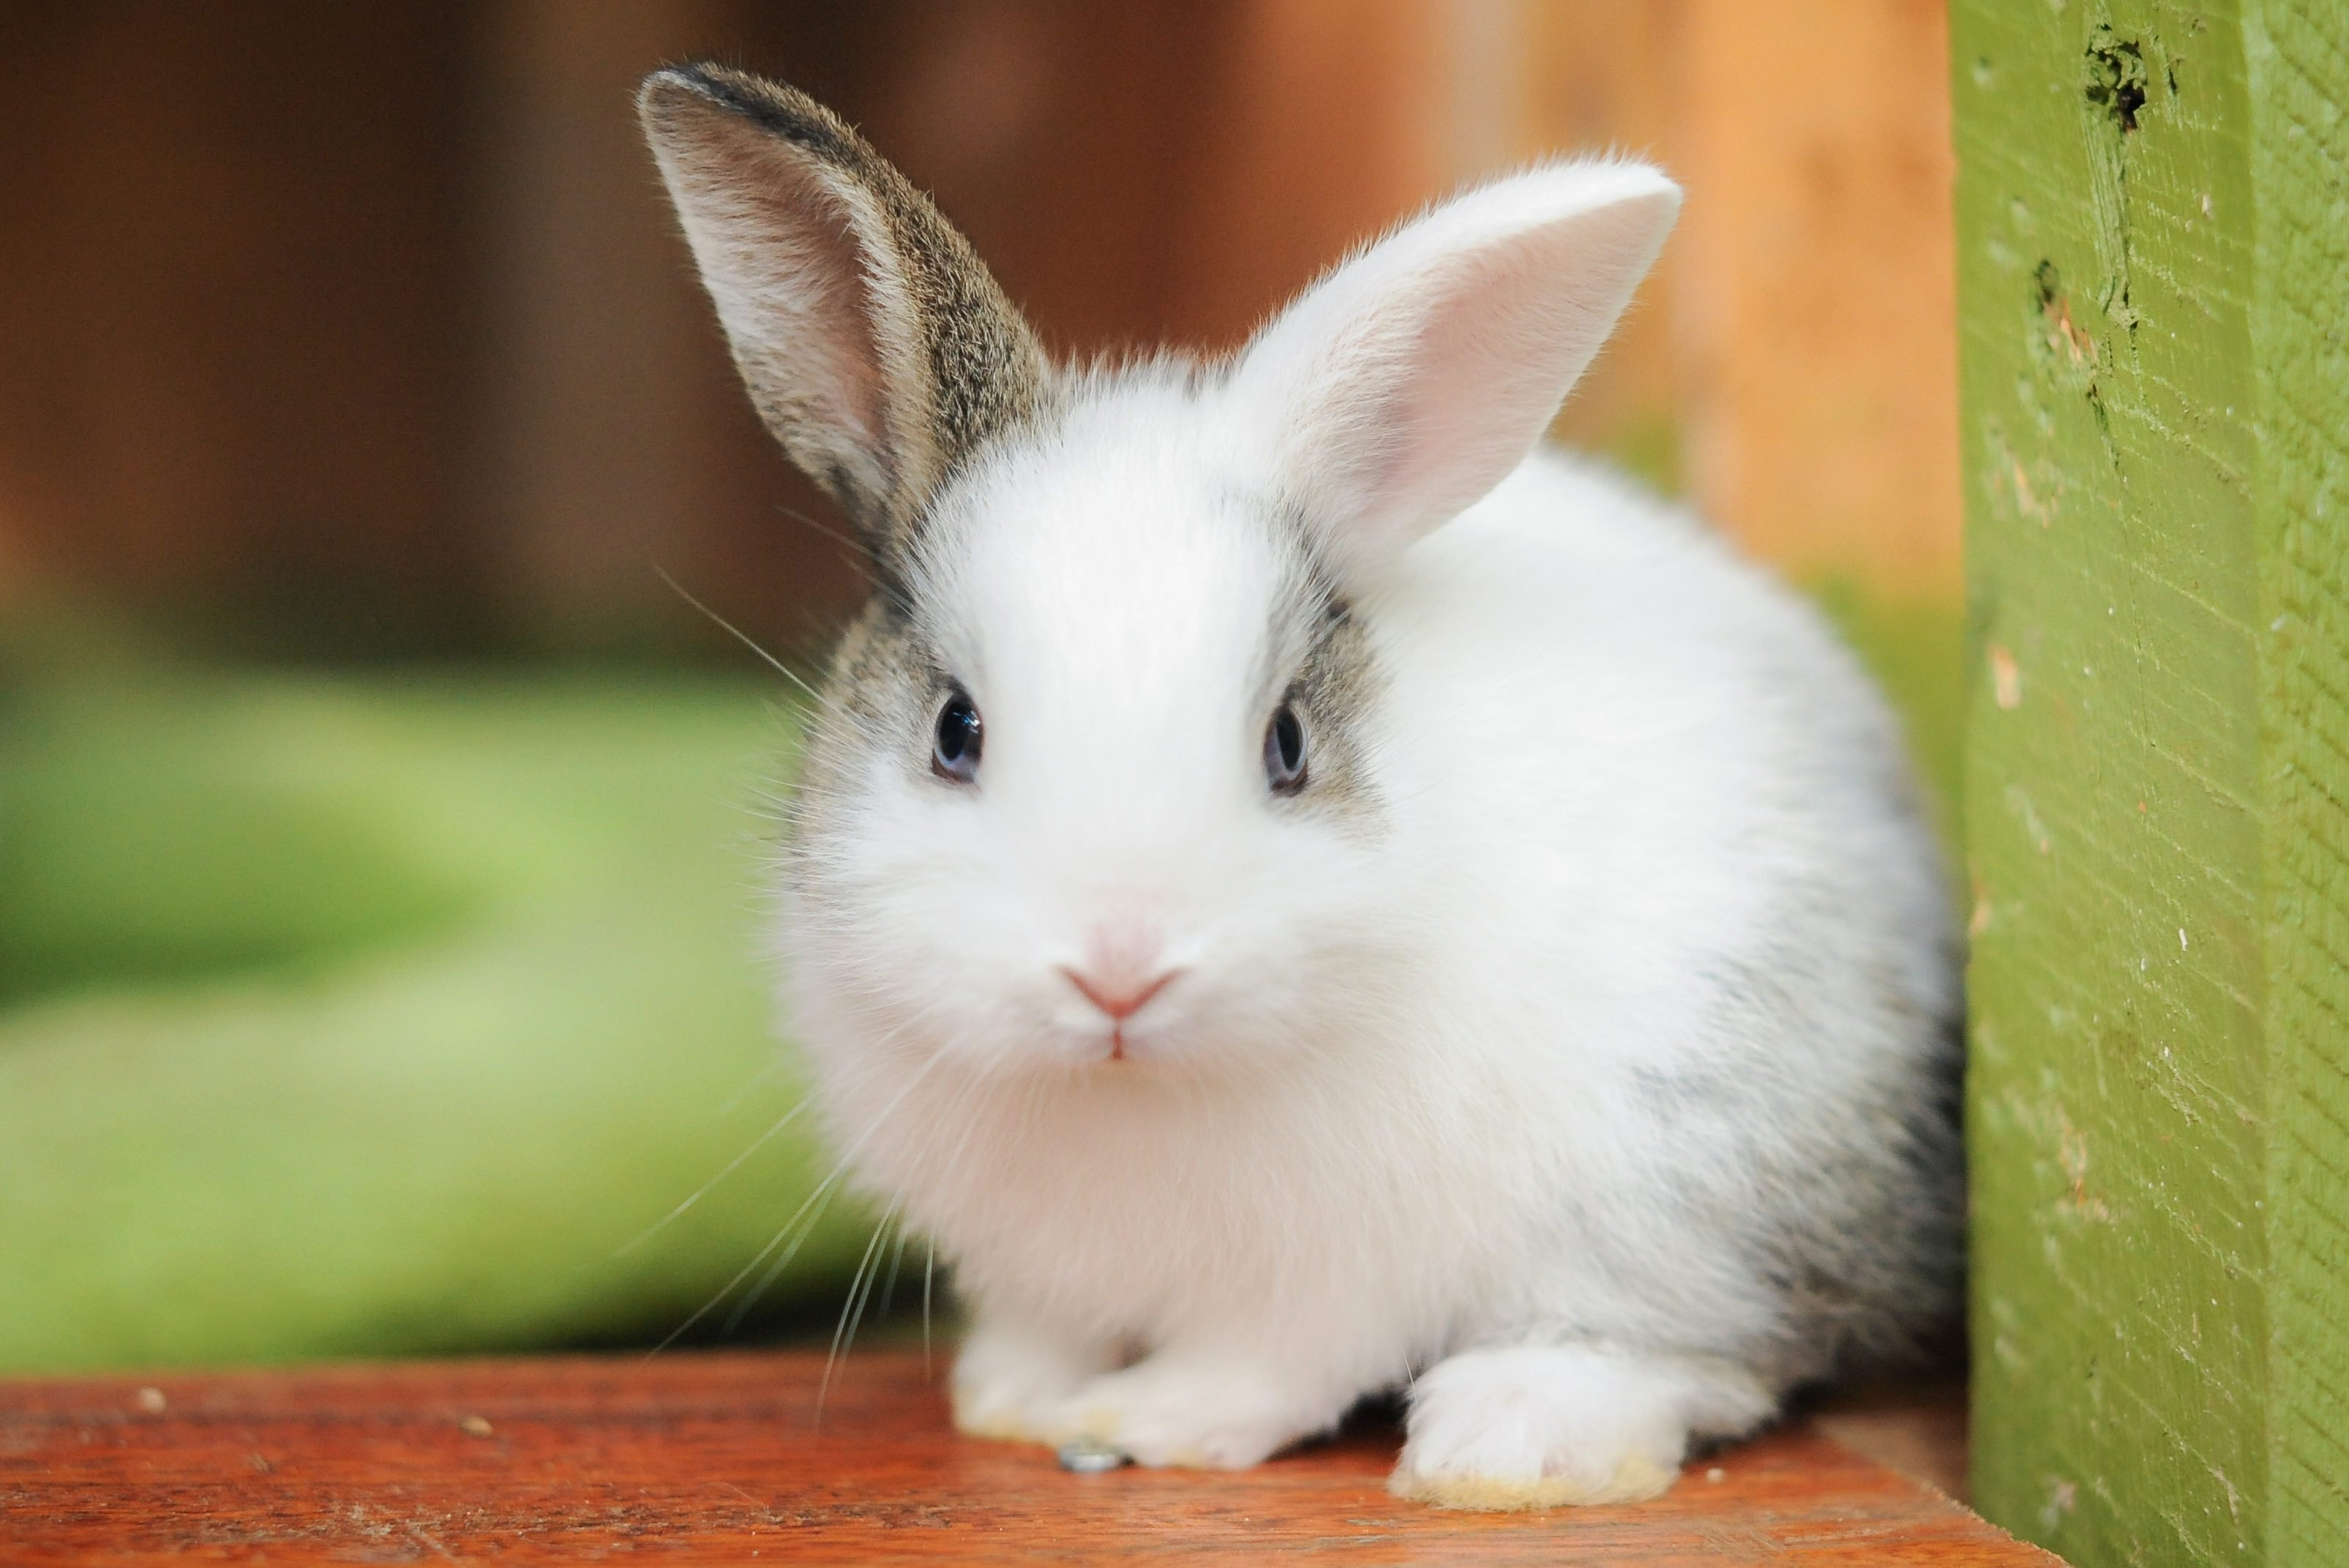

In [31]:
model = VGG16()
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/bunny.jpg' # Load data
img = load_img(img_path, target_size=(224, 224))                                  # Required size
img_array = img_to_array(img)                                                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)                                     # Increase dimention for CNN
img_pre_processed = preprocess_input(img_array)                                   # Process data 
preds = model.predict(img_pre_processed)                                          # Predict data 
decode_predictions(preds, top=5) 

[[('n02326432', 'hare', 0.37036386),
  ('n02325366', 'wood_rabbit', 0.32504395),
  ('n02328150', 'Angora', 0.30321243),
  ('n01877812', 'wallaby', 0.0012401649),
  ('n02342885', 'hamster', 6.409403e-05)]]

# Condom

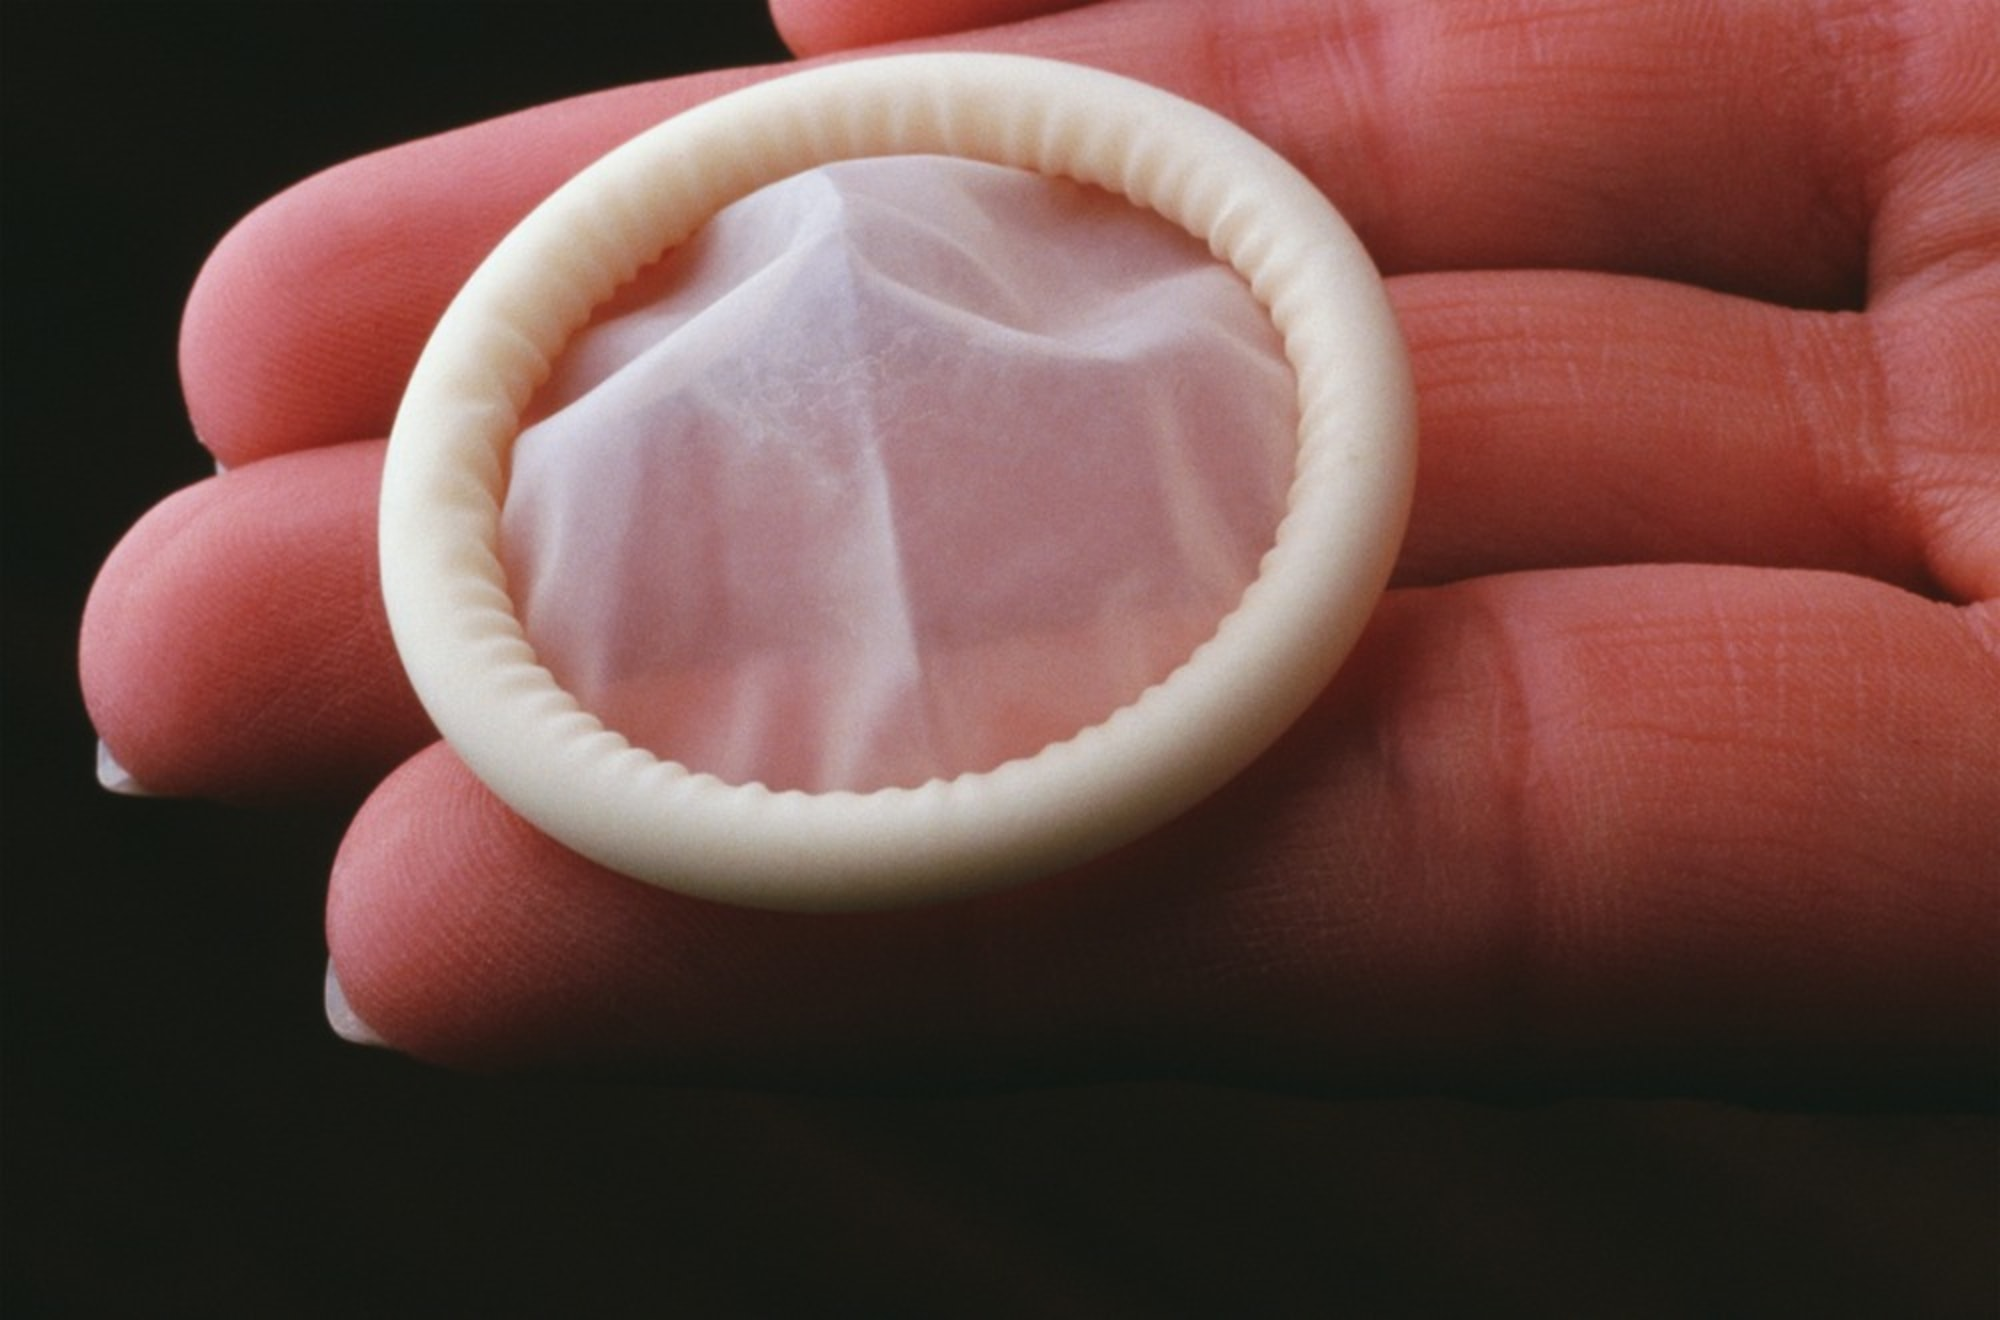

In [29]:
model = VGG19()
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/condom.jpg' # Load data
img = load_img(img_path, target_size=(224, 224))                                  # Required size
img_array = img_to_array(img)                                                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)                                     # Increase dimention for CNN
img_pre_processed = preprocess_input(img_array)                                   # Process data 
preds = model.predict(img_pre_processed)                                          # Predict data 
decode_predictions(preds, top=5) 

[[('n03627232', 'knot', 0.23864813),
  ('n01930112', 'nematode', 0.13771252),
  ('n03825788', 'nipple', 0.06952664),
  ('n03065424', 'coil', 0.06379113),
  ('n02786058', 'Band_Aid', 0.062068995)]]

# Viberator

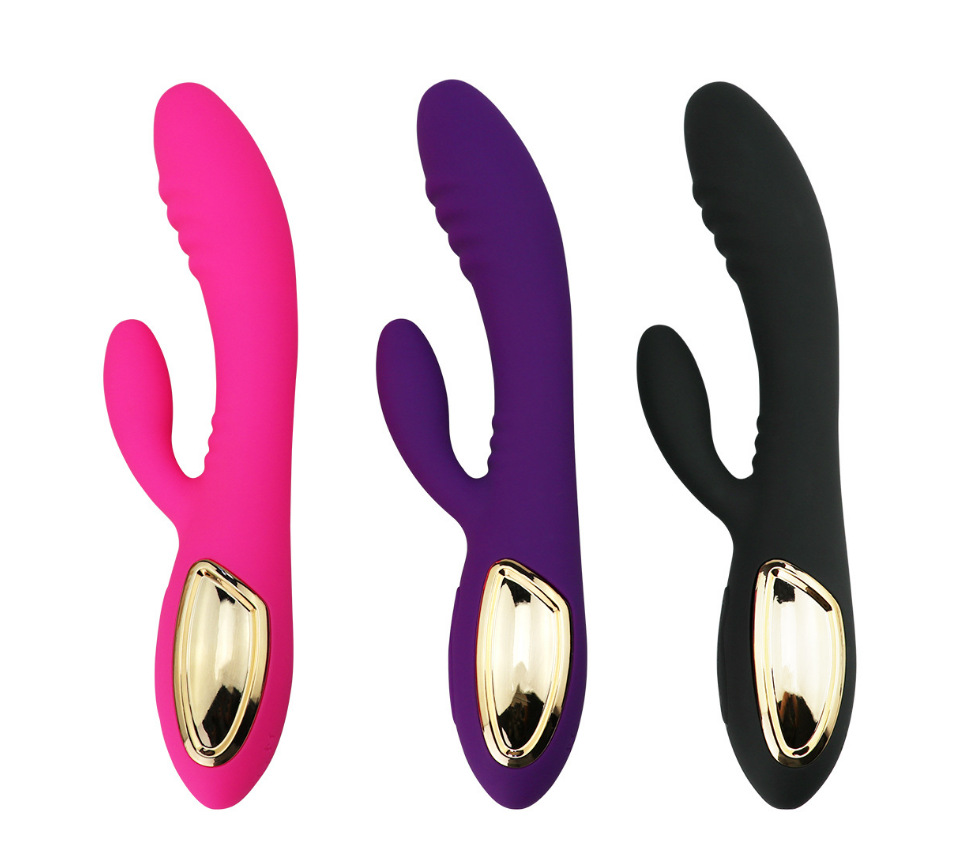

In [32]:
model = VGG16()
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/viberator.jpg' # Load data
img = load_img(img_path, target_size=(224, 224))                                  # Required size
img_array = img_to_array(img)                                                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)                                     # Increase dimention for CNN
img_pre_processed = preprocess_input(img_array)                                   # Process data 
preds = model.predict(img_pre_processed)                                          # Predict data 
decode_predictions(preds, top=5) 

[[('n03532672', 'hook', 0.62494713),
  ('n03476684', 'hair_slide', 0.08121978),
  ('n02951585', 'can_opener', 0.07279821),
  ('n02783161', 'ballpoint', 0.027360499),
  ('n03109150', 'corkscrew', 0.022666477)]]

#### The Model doesnt understand Adult products, From above examples

# Lets try to use resnet model 

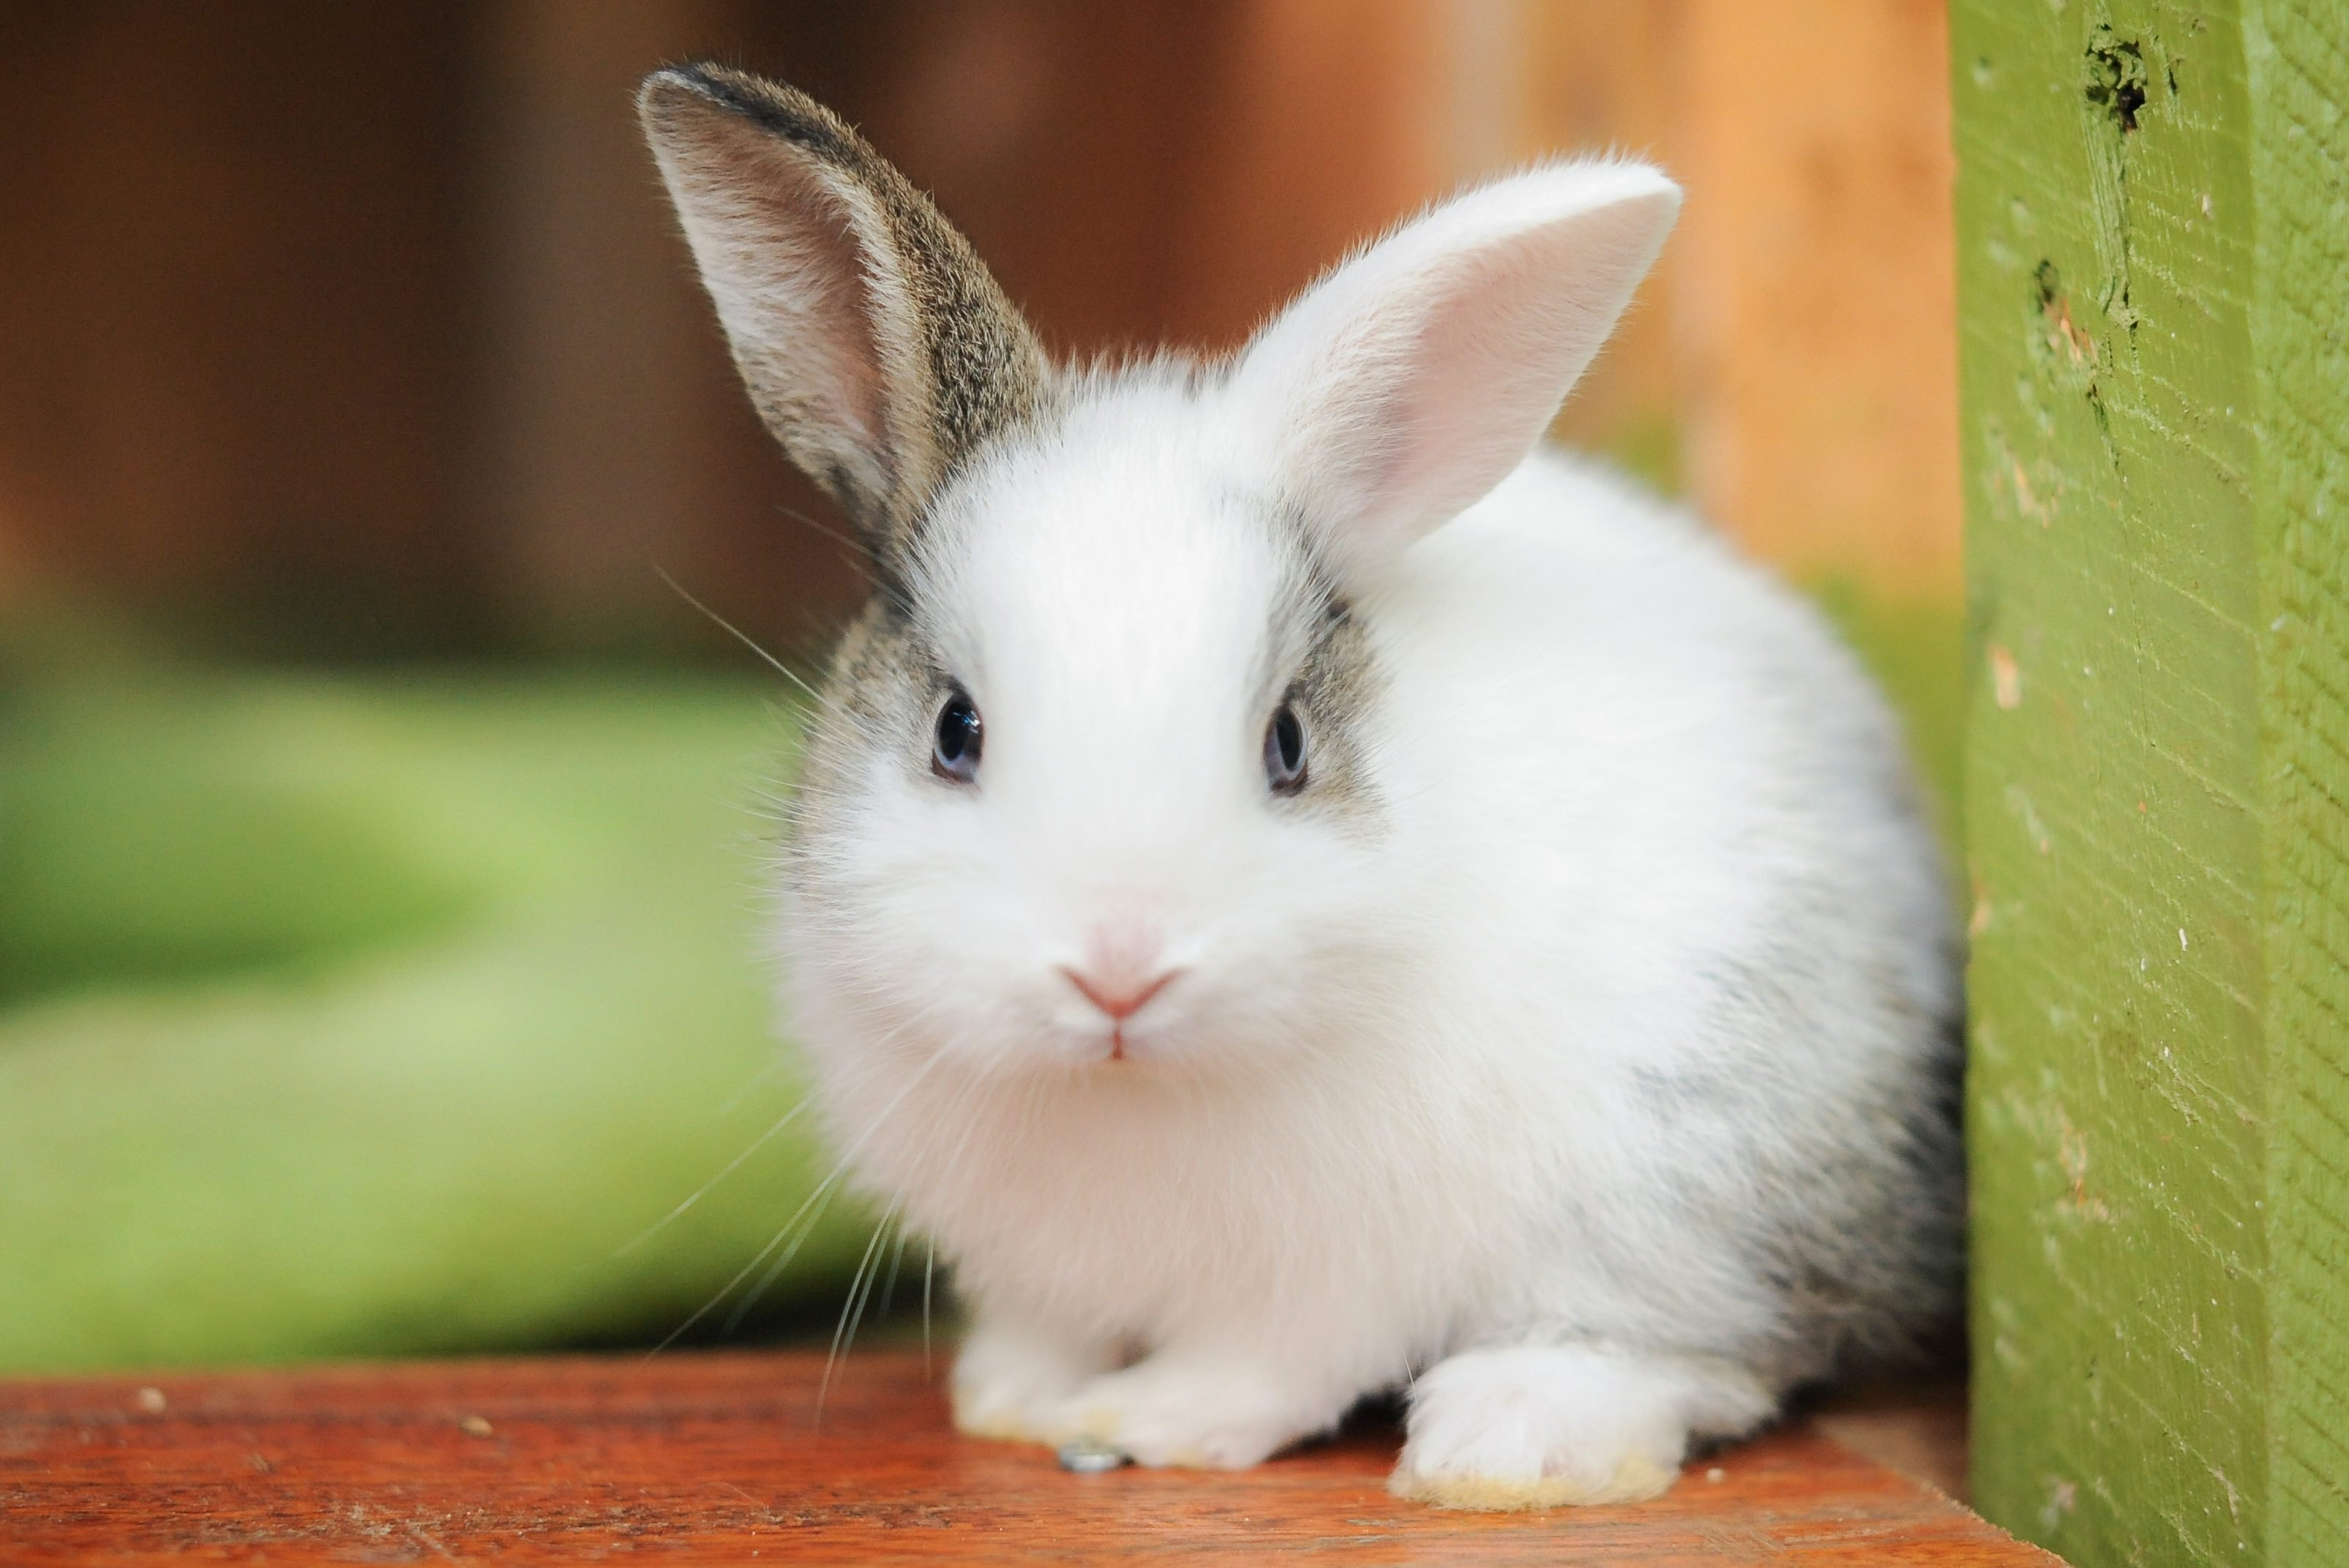

In [34]:
from keras.applications.resnet import ResNet50
model = ResNet50()
img_path = 'C:/Users/aaron/Data Science/TERM 2/3. Deep Learning and AI/bunny.jpg' # Load data
img = load_img(img_path, target_size=(224, 224))                                  # Required size
img_array = img_to_array(img)                                                     # Convert to array
img_array = np.expand_dims(img_array, axis=0)                                     # Increase dimention for CNN
img_pre_processed = preprocess_input(img_array)                                   # Process data 
preds = model.predict(img_pre_processed)                                          # Predict data 
decode_predictions(preds, top=5) 

102981632/102967424 [==============================] - 16s 0us/step


[[('n02326432', 'hare', 0.3891321),
  ('n02325366', 'wood_rabbit', 0.35522434),
  ('n02328150', 'Angora', 0.2503371),
  ('n01877812', 'wallaby', 0.00377385),
  ('n02342885', 'hamster', 0.0008842469)]]

#### Same result as VGG16